In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 一、对chipotle.csv文件的销售数据进行分析

####  1、把chipotle.csv文件内容读取到一个名为chipo的数据框中，并显示该文件的前10行记录

In [2]:
chipo=pd.read_csv("chipotle.csv")
chipo.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

#### 2、获取chipo数据框中每列的数据类型

In [3]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

#### 3、获取数据框chipo中所有订单购买商品的总数量

In [4]:
chipo['quantity'].sum()

4972

#### 4、给出数据框chipo中包含的订单数量

In [5]:
chipo['order_id'].unique().size

1834

#### 5、查询出购买同一种商品数量超过3个的所有订单

In [6]:
chipo.loc[chipo['quantity']>3,'order_id':'item_name']

order_id  quantity                     item_name
1254       511         4               Chicken Burrito
1257       511         4  Chips and Fresh Tomato Salsa
1425       577         4                 Bottled Water
1880       759         4                 Bottled Water
2235       901         4                   Canned Soda
2441       970         5                 Bottled Water
3598      1443        15  Chips and Fresh Tomato Salsa
3599      1443         7                 Bottled Water
3602      1443         4               Chicken Burrito
3887      1559         8                 Side of Chips
3973      1592         4             Canned Soft Drink
4152      1660        10                 Bottled Water
4489      1786         4           Chips and Guacamole
4490      1786         4             Canned Soft Drink
4491      1786         4             Canned Soft Drink

#### 6、查询出同时购买‘Chicken Bowl’和'Steak Bowl'商品的所有订单

In [7]:
df1=chipo.loc[chipo['item_name']=="Chicken Bowl",["order_id",'item_name']]
df2=chipo.loc[chipo['item_name']=="Chicken Soft Tacos",["order_id",'item_name']]
df3=df1.merge(df2,on='order_id').drop_duplicates()
df3

order_id   item_name_x         item_name_y
0         34  Chicken Bowl  Chicken Soft Tacos
2        360  Chicken Bowl  Chicken Soft Tacos
3        362  Chicken Bowl  Chicken Soft Tacos
4        561  Chicken Bowl  Chicken Soft Tacos
5        577  Chicken Bowl  Chicken Soft Tacos
6        720  Chicken Bowl  Chicken Soft Tacos
7        759  Chicken Bowl  Chicken Soft Tacos
10       916  Chicken Bowl  Chicken Soft Tacos
12      1006  Chicken Bowl  Chicken Soft Tacos
13      1057  Chicken Bowl  Chicken Soft Tacos
15      1166  Chicken Bowl  Chicken Soft Tacos
16      1223  Chicken Bowl  Chicken Soft Tacos
17      1449  Chicken Bowl  Chicken Soft Tacos
18      1768  Chicken Bowl  Chicken Soft Tacos

#### 7、找出购买商品数量最多的5个订单

In [8]:
chipo.groupby("order_id").sum().sort_values("quantity",ascending=False).head()

quantity
order_id          
1443            35
926             23
1786            20
1660            19
759             18

#### 8、找出choice_description字段缺失的商品名称及其订单编号

In [9]:
chipo.loc[chipo['choice_description'].isnull(),["order_id",'item_name']]

order_id                              item_name
0            1           Chips and Fresh Tomato Salsa
3            1  Chips and Tomatillo-Green Chili Salsa
6            3                          Side of Chips
10           5                    Chips and Guacamole
14           7                    Chips and Guacamole
15           8  Chips and Tomatillo-Green Chili Salsa
20          10                    Chips and Guacamole
25          13           Chips and Fresh Tomato Salsa
30          15  Chips and Tomatillo-Green Chili Salsa
32          16                          Side of Chips
34          17                          Bottled Water
37          18                    Chips and Guacamole
38          18  Chips and Tomatillo Green Chili Salsa
40          19                                  Chips
41          20                    Chips and Guacamole
49          22                    Chips and Guacamole
55          25           Chips and Fresh Tomato Salsa
59          27                                  Chips
60          28                    Chips and Guacamole
70          31                          Side of Chips
72          32                    Chips and Guacamole
74          33                    Chips and Guacamole
77          34                                  Chips
80          35                                  Chips
87          38                          Bottled Water
89          39           Chips and Fresh Tomato Salsa
94          41                    Chips and Guacamole
96          42                    Chips and Guacamole
100         44                    Chips and Guacamole
103         45                    Chips and Guacamole
...        ...                                    ...
4507      1792                          Bottled Water
4509      1793                                  Chips
4512      1794                    Chips and Guacamole
4515      1795                    Chips and Guacamole
4517      1796                          Bottled Water
4525      1799                                  Chips
4529      1800                    Chips and Guacamole
4531      1801                    Chips and Guacamole
4534      1803                    Chips and Guacamole
4539      1804                    Chips and Guacamole
4542      1806                          Bottled Water
4544      1806                          Bottled Water
4548      1808                    Chips and Guacamole
4551      1809                    Chips and Guacamole
4563      1814                    Chips and Guacamole
4567      1816                    Chips and Guacamole
4568      1817                          Bottled Water
4570      1817                          Bottled Water
4575      1819                    Chips and Guacamole
4579      1821                    Chips and Guacamole
4582      1822                          Bottled Water
4584      1823                                  Chips
4588      1824                    Chips and Guacamole
4596      1826                    Chips and Guacamole
4598      1826                          Bottled Water
4600      1827                    Chips and Guacamole
4605      1828                    Chips and Guacamole
4613      1831                                  Chips
4614      1831                          Bottled Water
4616      1832                    Chips and Guacamole

[1246 rows x 2 columns]

#### 9、将item_price列的数据转换为浮点数类型

In [10]:
#dollarizer = lambda x: float(x[1:])
#chipo['item_price'] = chipo['item_price'].apply(dollarizer)
chipo['item_price'] = chipo['item_price'].str[1:]
chipo['item_price']=chipo['item_price'].astype(float)
chipo.dtypes
chipo.head()

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98

#### 10、找出销售额最多的前5个订单

In [11]:
chipo.groupby("order_id").agg({"item_price":"sum"}).sort_values("item_price",ascending=False).head()

item_price
order_id            
926           205.25
1443          160.74
1483          139.00
691           118.25
1786          114.30

#### 11、找出单价最高的商品

In [12]:
chipo.loc[chipo['item_price'].argmax(),:]

order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                   44.25
Name: 3598, dtype: object

#### 12、找出平均单价最高的商品

In [13]:
chipo.groupby("item_name")["item_price"].mean().sort_values(ascending=False).head(1)

item_name
Bowl    14.8
Name: item_price, dtype: float64

### 二、对描述泰坦尼克号成员的信息进行可视化和相关分析

#### 13、打开train.csv文件，把其内容读入到一个名为titanic的数据框中，并绘制一个展示幸存者(Survived字段值为1)中男女乘客比例的扇形图

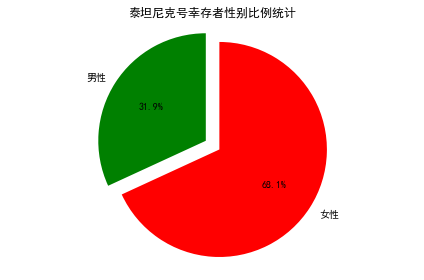

In [14]:
titanic = pd.read_csv("train.csv")
plt.rcParams['font.sans-serif']=['SimHei']
# sum the instances of males and females
males = ((titanic['Survived'] == 1)&(titanic['Sex'] == 'male')).sum()
females = ((titanic['Survived'] == 1)&(titanic['Sex'] == 'female')).sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['男性', '女性'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['green','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("泰坦尼克号幸存者性别比例统计")

# View the plot
plt.tight_layout()
plt.show()

#### 14、通过直方图统计幸存者中各年龄段中的人数

[ 38.  41.  77.  73.  34.  20.   6.   0.   1.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90.]


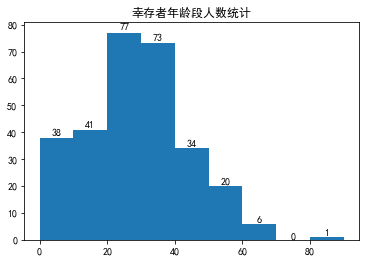

In [17]:
svd_age=titanic.loc[(titanic['Survived'] == 1)&(titanic['Age']),'Age']
svd_age_lst=list(svd_age.data)
svd_age_min=int(min(svd_age_lst))//10
svd_age_max=int(max(svd_age_lst))//10
#age_nums=[]
#for age in range(svd_age_min*10,(svd_age_max+1)*10,10):
#    nums=((titanic['Survived'] == 1)&(titanic['Age']>=age)&(titanic['Age']<(age+10))).sum()
#    age_nums.append(nums)
#age_1=((titanic['Survived'] == 1)&(titanic['Age'].between(0,10))).sum()
#print(age_nums)
#n,bins,patches=plt.hist(svd_age_lst, bins = range(svd_age_min*10,(svd_age_max+2)*10,10))
n,bins,_=plt.hist(svd_age_lst,bins=9,range=(0,90))
print(n)
print(bins)
#print(patches)
for i in range(len(n)):
    plt.text(bins[i]+(bins[1]-bins[0])/2,n[i]*1.01,'{}'.format(int(n[i])), ha='center', va='bottom')
plt.title("幸存者年龄段人数统计")
plt.show()

#### 15、统计不同等级舱位(通过Pclass字段值表示舱位等级)的存活率并通过柱形图加以展示

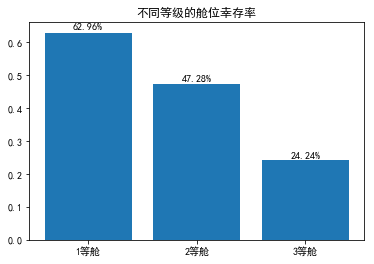

In [19]:
plt.rcParams['font.sans-serif']=['SimHei']
pclass_total=titanic.groupby('Pclass')["PassengerId"].count()
#print(pclass_total)
pclass_svd=titanic.loc[titanic['Survived'] == 1,:].groupby('Pclass')["PassengerId"].count()
svd_rto=pclass_svd/pclass_total
#print(pclass_svd)
#print(pclass_svd/pclass_total)
plt.bar(pclass_total.index,pclass_svd/pclass_total)
#plt.yticks(range(0,0.9,0.1))
plt.xticks(pclass_total.index,[str(i)+"等舱" for i in pclass_total.index])
plt.title("不同等级的舱位幸存率")
for i in pclass_total.index:
    plt.text(i,svd_rto[i]*1.01,f"{svd_rto[i]:.2%}", ha='center', va='bottom')
plt.show()

#### 16、以数据透视表形式展示不同等级舱位、不同性别的遇难者/幸存者人数

In [21]:
titanic.pivot_table(index='Survived',columns=['Pclass','Sex'],values='PassengerId',aggfunc='count')

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47